# Descent Comparison Example

In [1]:
from   lib.linear      import LinearRegression, LinearRegressionSteepestDescent, LinearRegressionConjugateGradientDescent
from   lib.likelihoods import gaussian_log_likelihood
from   lib.data        import gen_linear_data
from   lib.metrics     import mse
from   lib.utils       import savefig

from   matplotlib import pyplot as plt
from   itertools  import product
from   scipy      import stats

import numpy as np

### Simple 2D Correlated Data Generation

In [2]:
w_true = [5, -8]
b_true = 0

cov    = [[2, 1], [1, 2]]
noise  = 0.

(X, y), (w_true, b_true), (Xc, yc) = gen_linear_data(100, cov, noise, w_true, b_true, random_state = 0)

### Visualisation of Data on the Hyperplane

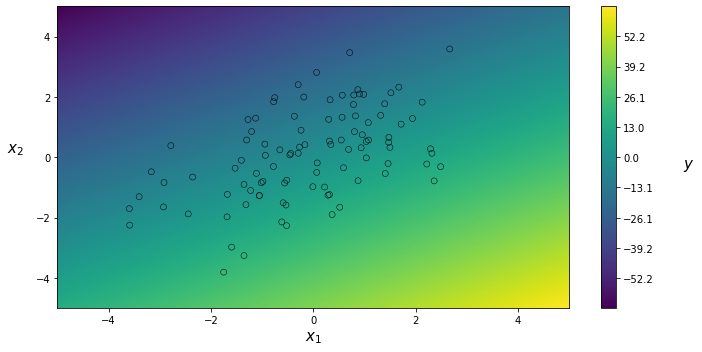

In [3]:
fig, ax = plt.subplots(figsize = (10, 5))

contour = ax.tricontourf(*Xc.T, yc, levels = 1000)
scatter = ax.scatter(*X.T, c = 'none', ec = 'k', lw = 0.5)
cbar = fig.colorbar(contour)
cbar.set_label(r'$y$', size = 15, rotation = 0, labelpad = 35)

plt.xlabel(r'$x_1$', size = 15)
plt.ylabel(r'$x_2$', size = 15, rotation = 0, labelpad = 20)

plt.tight_layout()

savefig('descent-methods/toy-data.png')

### Model Fitting

In [4]:
analytic  = LinearRegression(fit_intercept = False).fit(X, y)
naive     = LinearRegressionSteepestDescent(alpha = 1e-1  , fit_intercept = False).fit(X, y)
better    = LinearRegressionSteepestDescent(alpha = 'auto', fit_intercept = False).fit(X, y)
conjugate = LinearRegressionConjugateGradientDescent(fit_intercept = False).fit(X, y)

### Visualisation of the Solution Path

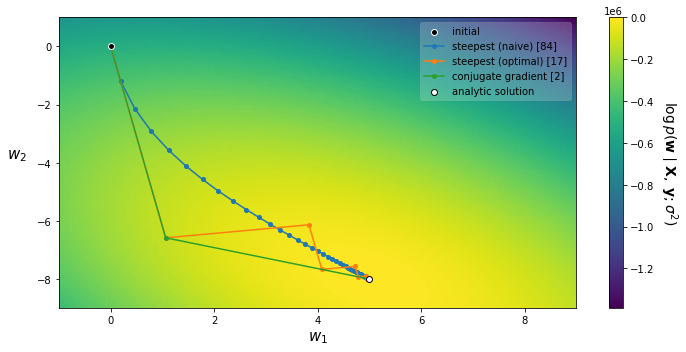

In [5]:
w1 = np.linspace(-1, 9, 10 * 10 + 1)
w2 = np.linspace(-9, 1, 10 * 10 + 1)
w  = np.array(list(product(w1, w2)))


log_p = gaussian_log_likelihood(w, b_true, X, y, 0.1)

fig, ax = plt.subplots(figsize = (10, 5))

mesh = plt.tripcolor(*w.T, log_p)
plt.scatter(0, 0, c = 'k', ec = 'w', zorder = 5, label = 'initial')

for model, label in zip([naive, better, conjugate], ['steepest (naive)', 'steepest (optimal)', 'conjugate gradient']):
    plt.plot(*model.history.T, 'o-', ms = 4, label = f'{label} [{len(model.history) - 1}]')

plt.scatter(*analytic.w, c = 'w', ec = 'k', zorder = 5, label = 'analytic solution')
plt.xlim((w1.min(), w1.max()))
plt.ylim((w2.min(), w2.max()))

plt.xlabel(r'$w_1$', size = 15)
plt.ylabel(r'$w_2$', size = 15, rotation = 0, labelpad = 20)

plt.legend(framealpha = 0.2)

cbar = fig.colorbar(mesh)
cbar.set_label(r'$\log p(\mathbf{w}\mid \mathbf{X},\ \mathbf{y}; \sigma^2)$', rotation = 270, labelpad = 25, size = 14)

plt.tight_layout()
# plt.grid(ls = (0, (5, 5)))
savefig('descent-methods/comparison.png', dpi = 500)

### Generate 10-D Noisy Data with High Condition

In [6]:
np.random.seed(0)

Q = stats.ortho_group.rvs(dim = 10)
S = stats.uniform().rvs(10)
S[:2] = 100

cov = Q.T @ np.diag(S) @ Q

(X, y), (w_true, b_true), (Xc, yc) = gen_linear_data(100, cov, noise = 0.5, b = 0, random_state = 0)

### Model Fitting

In [7]:
analytic  = LinearRegression(fit_intercept = False).fit(X, y)
naive     = LinearRegressionSteepestDescent(alpha = 1e-4  , fit_intercept = False).fit(X, y)
better    = LinearRegressionSteepestDescent(alpha = 'auto', fit_intercept = False).fit(X, y)
conjugate = LinearRegressionConjugateGradientDescent(fit_intercept = False).fit(X, y)

### Visualise Loss

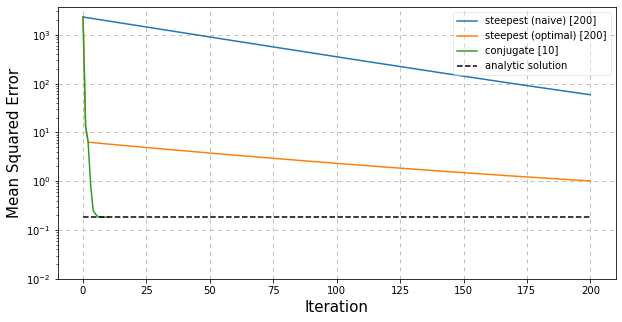

In [8]:
fig, ax = plt.subplots(figsize = (10, 5))

for model, label in zip([naive, better, conjugate], ['steepest (naive)', 'steepest (optimal)', 'conjugate']):
    plt.semilogy(model.loss, label = f'{label} [{len(model.loss) - 1}]')

plt.plot([0, 200], [mse(y, analytic.predict(X))] * 2, 'k--', label = 'analytic solution')
# plt.yscale('symlog')

plt.ylim((1e-2, plt.ylim()[1]))

plt.grid(ls = (0, (5, 5)))

plt.legend(framealpha = 0.4, loc = 1)
plt.xlabel('Iteration', size = 15)
plt.ylabel('Mean Squared Error', size = 15)
plt.show()